# Tutorial: Computing the Source-Frame BBH Merger-Rate Density from SFR + Exponential Time Delay

This tutorial explains how to compute the **source-frame volumetric merger-rate density** of binary black holes (BBHs),

$$ 
\begin{equation}
\begin{split}
R_{\rm m}(z)\equiv \frac{dN_{\rm merge}}{dV_c\,dt_s},
\end{split}
\end{equation} 
$$

starting from the **cosmic star-formation rate density** (SFR) and a **time-delay distribution** between binary formation and merger.

The goal is that a Master's student can:
1. understand the mathematics, and  
2. implement it correctly in Python.

We follow the analytical formulation used in *Vitale et al., "Measuring the star formation rate with gravitational waves from binary black holes"*.

---

## 0) What you will compute (the target quantity)

### Source-frame merger-rate density

The source-frame merger-rate density is defined as

$$ 
\begin{equation}
\begin{split}
R_{\rm m}(z)\equiv \frac{dN_{\rm merge}}{dV_c\,dt_s}
\quad [{\rm Gpc^{-3}\,yr^{-1}}].
\end{split}
\end{equation} 
$$

- $dV_c$: comoving volume element  
- $dt_s$: **source-frame** time interval  
- $z$: merger redshift  

> This is an **astrophysical merger-rate density**, not a detector yield.

---

## 1) Ingredients of the model (physical picture)

BBHs in the field form from massive stellar binaries. The merger-rate density at redshift $z$ depends on:

1. **how many stars formed at earlier cosmic times** (the SFR history),  
2. **how efficiently that star formation produces BBH progenitors** (metallicity dependent),  
3. **how long it takes from formation to merger** (time delay).  

Mathematically, this becomes a **convolution** of the formation rate with a delay-time distribution.

---

## 2) Cosmology: mapping redshift $\leftrightarrow$ cosmic time

To connect **formation redshift** $z_f$ to **merger redshift** $z_m$, we use the cosmic time $t(z)$, interpreted as the **age of the Universe at redshift $z$**.

### 2.1 Expansion rate

Assuming flat $\Lambda$CDM, the Hubble rate is

$$ 
\begin{equation}
\begin{split}
H(z)=H_0\,E(z),
\qquad
E(z)=\sqrt{\Omega_m(1+z)^3+\Omega_\Lambda}.
\end{split}
\end{equation} 
$$

### 2.2 Differential time–redshift relation

Cosmic time decreases with redshift as

$$ 
\begin{equation}
\begin{split}
\frac{dt}{dz}=-\frac{1}{(1+z)H(z)}.
\end{split}
\end{equation} 
$$

We will often use the positive quantity

$$ 
\begin{equation}
\begin{split}
\left|\frac{dt}{dz}\right|=\frac{1}{(1+z)H(z)}.
\end{split}
\end{equation} 
$$

### 2.3 Delay time

If a BBH forms at redshift $z_f$ and merges at redshift $z_m$ (with $z_f>z_m$), the delay time is

$$ 
\begin{equation}
\begin{split}
t_d(z_m,z_f)=t(z_m)-t(z_f)\ge 0.
\end{split}
\end{equation} 
$$

This definition is unambiguous when $t(z)$ is the **cosmic age**.

---

## 3) Star-formation rate density $\psi(z)$

We use the Madau–Dickinson functional form

$$ 
\begin{equation}
\begin{split}
\psi(z)=\psi_0\,
\frac{(1+z)^\alpha}{1+\left(\frac{1+z}{C}\right)^\beta},
\end{split}
\end{equation} 
$$

with typical parameters:
- $\alpha=2.7$
- $\beta=5.6$
- $C=2.9$
- $\psi_0=0.015~M_\odot\,{\rm Mpc^{-3}\,yr^{-1}}$

Units:
- $\psi(z)$ is in $M_\odot\,{\rm Mpc^{-3}\,yr^{-1}}$.

---

## 4) Metallicity-dependent efficiency $\eta(z)$

BBHs form more efficiently at **low metallicity**, because stellar winds are weaker and massive stars retain more mass. We encode this using an efficiency factor $\eta(z)\in[0,1]$, interpreted as:

- $\eta(z)$ is the fraction of star formation occurring at metallicity below $0.1Z_\odot$.

### 4.1 Metallicity distribution (log-normal model)

Assume

$$ 
\begin{equation}
\begin{split}
\log_{10}\!\left(\frac{Z}{Z_\odot}\right)
\sim
\mathcal{N}\!\left(
\log_{10}\!\left(\frac{Z_{\rm mean}(z)}{Z_\odot}\right),
\sigma_Z^2
\right),
\end{split}
\end{equation} 
$$

with $\sigma_Z=0.5$ dex.

### 4.2 Efficiency as a cumulative probability

Then

$$ 
\begin{equation}
\begin{split}
\eta(z)=P(Z<0.1Z_\odot)
=
\frac{1}{2}\left[
1+\operatorname{erf}\left(
\frac{\log_{10}(0.1)-\log_{10}\!\left(\frac{Z_{\rm mean}(z)}{Z_\odot}\right)}
{\sqrt{2}\sigma_Z}
\right)\right].
\end{split}
\end{equation} 
$$

---

## 4.3 Mean metallicity evolution $Z_{\rm mean}(z)$ (Belczynski-style)

Vitale points to Belczynski et al. (2016) for $Z_{\rm mean}(z)$. The commonly used prescription is

$$ 
\begin{equation}
\begin{split}
\log_{10}\!\left(\frac{Z_{\rm mean}(z)}{Z_\odot}\right)
=
0.5+\log_{10}\!\left[
\frac{y(1-R)}{\rho_b}
\int_{z}^{20}
\frac{97.8\times 10^{10}\,\psi(z')}
{H_0\,E(z')\,(1+z')}
\,dz'
\right].
\end{split}
\end{equation} 
$$

with constants:
- $R=0.27$ (return fraction),
- $y=0.019$ (metal yield),
- $\rho_b=2.77\times 10^{11}\,\Omega_b\,h_0^2~M_\odot~{\rm Mpc^{-3}}$ (baryon density).

### Practical note on numerical implementation

Instead of hard-coding the factor $97.8\times 10^{10}$, the numerically safest approach is to compute the time element directly:

$$ 
\begin{equation}
\begin{split}
\frac{dz'}{H_0E(z')(1+z')}
=
\left|\frac{dt}{dz'}\right|\,dz',
\end{split}
\end{equation} 
$$

so the metallicity integral can be evaluated with consistent units as

$$ 
\begin{equation}
\begin{split}
\int_{z}^{z_{\max}}\psi(z')\left|\frac{dt}{dz'}\right|dz'.
\end{split}
\end{equation} 
$$

This preserves the same physics while avoiding unit-normalization mistakes.

---

## 5) BBH formation-rate density $R_f(z)$

Assume BBH formation follows SFR weighted by low-metallicity efficiency:

$$ 
\begin{equation}
\begin{split}
R_f(z)=A\,\eta(z)\,\psi(z).
\end{split}
\end{equation} 
$$

Here $A$ is an unknown proportionality constant, fixed by local-rate normalization.

---

## 6) Exponential time-delay distribution

We use an exponential time-delay kernel:

$$ 
\begin{equation}
\begin{split}
p(t_d|\tau)=\frac{1}{\tau}\exp(-t_d/\tau),
\qquad t_d\ge 0.
\end{split}
\end{equation} 
$$

It is normalized automatically:

$$ 
\begin{equation}
\begin{split}
\int_{0}^{\infty}p(t_d|\tau)\,dt_d=1.
\end{split}
\end{equation} 
$$

---

## 7) Merger-rate density $R_m(z)$: the key equation

A BBH that merges at $z_m$ must have formed earlier at $z_f\ge z_m$. The merger-rate density is

$$ 
\begin{equation}
\begin{split}
R_m(z_m)
=
\int_{z_m}^{\infty}
dz_f\,
\left|\frac{dt}{dz_f}\right|
R_f(z_f)\,
p\!\left(t_d(z_m,z_f)\mid \tau\right).
\end{split}
\end{equation} 
$$

Substituting
$R_f(z_f)=A\,\eta(z_f)\psi(z_f)$ and the exponential kernel gives

$$ 
\begin{equation}
\begin{split}
R_m(z_m)
=
A\int_{z_m}^{\infty}
dz_f\,
\left|\frac{dt}{dz_f}\right|
\eta(z_f)\psi(z_f)\,
\frac{1}{\tau}\exp\!\left[-\frac{t(z_m)-t(z_f)}{\tau}\right].
\end{split}
\end{equation} 
$$

This is the **main formula** to implement.

---

## 8) Normalization using the local BBH merger rate (GWTC-4)

The unknown constant $A$ is fixed by imposing:

$$ 
\begin{equation}
\begin{split}
R_m(0)=R_0^{\rm BBH}.
\end{split}
\end{equation} 
$$

A representative local BBH rate from GWTC-4 is

$$ 
\begin{equation}
\begin{split}
R_0^{\rm BBH}\approx 19~{\rm Gpc^{-3}\,yr^{-1}}.
\end{split}
\end{equation} 
$$

### 8.1 Compute an unnormalized shape integral

Define the “shape” integral (with $A=1$):

$$ 
\begin{equation}
\begin{split}
I_0(\tau)=
\int_{0}^{\infty}
dz_f\,
\left|\frac{dt}{dz_f}\right|
\eta(z_f)\psi(z_f)\,
\frac{1}{\tau}\exp\!\left[-\frac{t(0)-t(z_f)}{\tau}\right].
\end{split}
\end{equation} 
$$

### 8.2 Solve for $A$

Then

$$ 
\begin{equation}
\begin{split}
A=\frac{R_0^{\rm BBH}}{I_0(\tau)}.
\end{split}
\end{equation} 
$$

Now $R_m(z)$ is fully specified.

---

## 9) Step-by-step computational algorithm (what to code)

### Step 1: Choose cosmology
Choose $(H_0,\Omega_m,\Omega_\Lambda)$, or use a built-in cosmology such as Planck18 in `astropy`.

### Step 2: Create a redshift grid
Choose $z_{\max}$ (e.g. $10$ or $20$) and construct
$z=[0,\Delta z,\dots,z_{\max}]$.

### Step 3: Compute $t(z)$ and $\left|\frac{dt}{dz}\right|$
Evaluate $t(z)$ (cosmic age) and

$$ 
\begin{equation}
\begin{split}
\left|\frac{dt}{dz}\right|=\frac{1}{(1+z)H(z)}.
\end{split}
\end{equation} 
$$

### Step 4: Compute $\psi(z)$
Evaluate the Madau–Dickinson SFR $\psi(z)$ on the grid.

### Step 5: Compute $\eta(z)$
1. compute $Z_{\rm mean}(z)$ using the Belczynski-style integral,
2. compute $\eta(z)$ using the error-function CDF formula.

### Step 6: Choose $\tau$
Pick a time-delay scale (example: $\tau=1~{\rm Gyr}$).

### Step 7: Compute the unnormalized $R_m(z)$
For each merger redshift $z_m$, evaluate the integral over $z_f\in[z_m,z_{\max}]$.

### Step 8: Normalize using GWTC-4
Enforce $R_m(0)=R_0^{\rm BBH}$ to solve for $A$.

---

## 10) Final output and detector-frame conversion

### Source-frame output
You obtain $R_m(z)$ in ${\rm Gpc^{-3}\,yr^{-1}}$.

### Detector-frame redshift rate density (all sky)

The detector-frame redshift distribution (events per observed time per redshift) is

$$ 
\begin{equation}
\begin{split}
\frac{d\dot N}{dz}
=
\frac{R_m(z)}{1+z}\,\frac{dV_c}{dz}.
\end{split}
\end{equation} 
$$

Here:
- $(1+z)^{-1}$ converts source-frame time to observer-frame time,
- $\frac{dV_c}{dz}$ is the comoving volume element over the full sky.

---

## 11) Practical notes (numerical and scientific)

1. **Upper limit of the formation redshift integral**  
   Replace $\infty$ by a finite $z_{\max}$. In practice $z_{\max}\sim 10$–$20$ is sufficient.

2. **Unit consistency**  
   If $\tau$ is in Gyr, then $t(z)$ must be in Gyr.  
   Using `astropy` avoids common unit conversion errors.

3. **Interpretation of $\tau$**  
   Small $\tau$: mergers closely track the SFR peak.  
   Large $\tau$: the merger rate shifts to lower redshift.

4. **Normalization**  
   Fixing $R_m(0)=R_0^{\rm BBH}$ sets the overall amplitude; the rest is the redshift evolution.

---

## 12) Summary of the full mathematical model (one box)

$$ 
\begin{equation}
\begin{split}
R_m(z_m)
=
A\int_{z_m}^{z_{\max}}
dz_f\,
\left|\frac{dt}{dz_f}\right|
\eta(z_f)\psi(z_f)\,
\frac{1}{\tau}\exp\!\left[-\frac{t(z_m)-t(z_f)}{\tau}\right].
\end{split}
\end{equation} 
$$

with

$$ 
\begin{equation}
\begin{split}
A=\frac{R_0^{\rm BBH}}{R_m(0)\big|_{A=1}},
\qquad
R_0^{\rm BBH}\approx 19~{\rm Gpc^{-3}\,yr^{-1}}.
\end{split}
\end{equation} 
$$

This completes the theory needed to implement the BBH merger-rate density in Python.


/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_60566/549537184.py:266: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Rm_tilde[i] = np.trapz(integrand, zf)
/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_60566/549537184.py:349: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_rates.append((tau, np.trapz(dNdt_dz, z)))


tau= 0.1 Gyr  |  Rm(0)=19.000  Gpc^-3 yr^-1
tau= 0.3 Gyr  |  Rm(0)=19.000  Gpc^-3 yr^-1
tau=   1 Gyr  |  Rm(0)=19.000  Gpc^-3 yr^-1
tau=   3 Gyr  |  Rm(0)=19.000  Gpc^-3 yr^-1
tau=  10 Gyr  |  Rm(0)=19.000  Gpc^-3 yr^-1

Integrated detector-frame all-sky merger rate (ideal; no selection effects):
  tau =  0.1 Gyr  -->  ∫ dz dN/dt_obs/dz = 5.508e+04  yr^-1
  tau =  0.3 Gyr  -->  ∫ dz dN/dt_obs/dz = 6.256e+04  yr^-1
  tau =    1 Gyr  -->  ∫ dz dN/dt_obs/dz = 4.469e+04  yr^-1
  tau =    3 Gyr  -->  ∫ dz dN/dt_obs/dz = 1.725e+04  yr^-1
  tau =   10 Gyr  -->  ∫ dz dN/dt_obs/dz = 6.259e+03  yr^-1


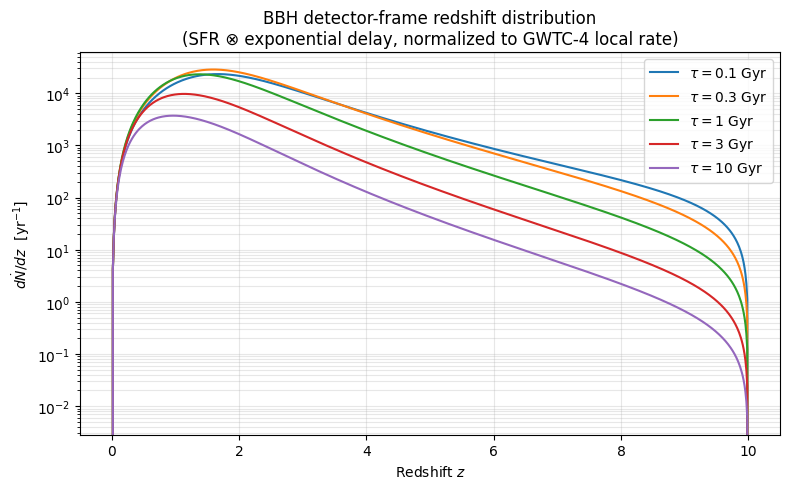

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_60566/549537184.py:375: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  y_norm = y / np.trapz(y, z)


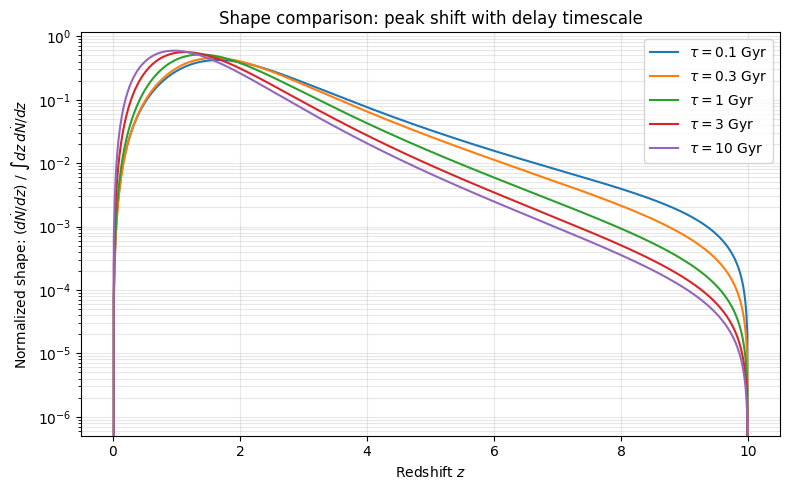

In [1]:
"""
BBH merger-rate density from SFR ⊗ exponential time-delay (Vitale et al. formulation)
====================================================================================

This script computes:

1) Source-frame volumetric BBH merger-rate density
       R_m(z)   [Gpc^-3 yr^-1]

2) Detector-frame differential merger rate (all sky)
       dN/dt_obs/dz  =  [R_m(z)/(1+z)] * (dV_c/dz)   [yr^-1]

using:
- Madau–Dickinson star-formation rate density psi(z)
- Metallicity efficiency eta(z) = fraction of star formation below 0.1 Z_sun
- Exponential delay kernel p(t_d|tau) = (1/tau) exp(-t_d/tau)
- Normalization to the GWTC-4 local BBH rate R_m(0) = R0_BBH

The implementation is unit-safe: all cosmological factors are computed with Astropy.
"""

from __future__ import annotations

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import cumulative_trapezoid
from scipy.special import erf

import astropy.units as u
from astropy.cosmology import Planck18


# ============================================================================
# 1) Star-Formation Rate (Madau–Dickinson)
# ============================================================================

def sfr_madau_dickinson(
    z: np.ndarray,
    psi0: float = 0.015,
    alpha: float = 2.7,
    beta: float = 5.6,
    C: float = 2.9,
) -> np.ndarray:
    """
    Madau–Dickinson (2014) star formation rate density.

    Parameters
    ----------
    z : np.ndarray
        Redshift array.
    psi0 : float
        Normalization in Msun Mpc^-3 yr^-1.
    alpha, beta, C : float
        Shape parameters.

    Returns
    -------
    psi : np.ndarray
        SFR density psi(z) in Msun Mpc^-3 yr^-1.

    Notes
    -----
    Functional form:
        psi(z) = psi0 (1+z)^alpha / [1 + ((1+z)/C)^beta]
    """
    z = np.asarray(z, dtype=float)
    return psi0 * (1.0 + z) ** alpha / (1.0 + ((1.0 + z) / C) ** beta)


# ============================================================================
# 2) Metallicity efficiency eta(z)
# ============================================================================

def log10_Zmean_belczynski(
    z_grid: np.ndarray,
    psi_grid: np.ndarray,
    cosmo=Planck18,
    Omega_b: float = 0.045,
    R: float = 0.27,
    y: float = 0.019,
) -> np.ndarray:
    """
    Mean metallicity evolution log10(Z_mean/Zsun) from a Belczynski-style model.

    This implements the same redshift-structure as used in Vitale et al. via Belczynski et al. (2016),
    but avoids hard-coded unit-conversion constants by evaluating the time element via dt/dz.

    Theory (schematic):
        log10(Z_mean/Zsun) = 0.5 + log10[ y(1-R)/rho_b * ∫_z^{zmax} psi(z') * |dt/dz'| dz' ]

    Parameters
    ----------
    z_grid : np.ndarray
        Increasing redshift grid starting at 0.
    psi_grid : np.ndarray
        SFR density psi(z) in Msun Mpc^-3 yr^-1 on the same grid.
    cosmo : astropy.cosmology instance
        Cosmology used to compute H(z) and hence dt/dz.
    Omega_b : float
        Baryon density parameter.
    R : float
        Return fraction.
    y : float
        Metal yield.

    Returns
    -------
    log10Zmean : np.ndarray
        log10(Z_mean/Zsun) evaluated on the grid.

    Notes
    -----
    - rho_b = 2.77e11 * Omega_b * h^2  [Msun Mpc^-3]
    - dt/dz = 1 / [(1+z)H(z)]          [time]
    - The integral produces a monotonically decreasing Z_mean(z) with redshift.
    """
    z = np.asarray(z_grid, dtype=float)
    psi = np.asarray(psi_grid, dtype=float)

    if not np.all(np.diff(z) > 0):
        raise ValueError("z_grid must be strictly increasing.")

    # Baryon density rho_b in Msun Mpc^-3
    h = cosmo.H0.value / 100.0
    rho_b = 2.77e11 * Omega_b * h**2

    # dt/dz in years (unit-safe)
    Hz = cosmo.H(z).to(1 / u.yr).value  # 1/yr
    abs_dt_dz_yr = 1.0 / ((1.0 + z) * Hz)  # yr per redshift

    # integrand: psi(z) * dt/dz  =>  Msun Mpc^-3
    integrand = psi * abs_dt_dz_yr

    # Integral from z to zmax via cumulative integral
    I_0_to_z = cumulative_trapezoid(integrand, z, initial=0.0)
    I_total = I_0_to_z[-1]
    I_z_to_zmax = I_total - I_0_to_z

    inside = (y * (1.0 - R) / rho_b) * np.clip(I_z_to_zmax, 1e-40, None)
    return 0.5 + np.log10(inside)


def eta_low_metallicity_fraction(
    log10Zmean: np.ndarray,
    sigma_dex: float = 0.5,
    Zth_over_Zsun: float = 0.1,
) -> np.ndarray:
    """
    Compute eta(z) = P(Z < Z_th) with a log-normal metallicity distribution.

    If log10(Z/Zsun) ~ Normal(log10(Z_mean/Zsun), sigma^2), then

        eta(z) = 0.5 * [1 + erf((log10 Z_th - log10 Z_mean)/(sqrt(2)*sigma))].

    Parameters
    ----------
    log10Zmean : np.ndarray
        log10(Z_mean/Zsun) on a redshift grid.
    sigma_dex : float
        Scatter in dex (default 0.5).
    Zth_over_Zsun : float
        Threshold metallicity in Zsun units (default 0.1).

    Returns
    -------
    eta : np.ndarray
        Low-metallicity fraction in [0, 1].
    """
    log10Zth = np.log10(Zth_over_Zsun)
    arg = (log10Zth - log10Zmean) / (np.sqrt(2.0) * sigma_dex)
    return 0.5 * (1.0 + erf(arg))


# ============================================================================
# 3) Delay kernel and source-frame merger rate R_m(z)
# ============================================================================

def exponential_delay_pdf(td_Gyr: np.ndarray, tau_Gyr: float) -> np.ndarray:
    """
    Exponential time-delay distribution p(t_d|tau).

        p(t_d|tau) = (1/tau) exp(-t_d/tau),  for t_d >= 0.

    Parameters
    ----------
    td_Gyr : np.ndarray
        Delay times in Gyr (must be >= 0).
    tau_Gyr : float
        Exponential scale time in Gyr.

    Returns
    -------
    p : np.ndarray
        Probability density in 1/Gyr.
    """
    if tau_Gyr <= 0:
        raise ValueError("tau_Gyr must be > 0.")
    td = np.asarray(td_Gyr, dtype=float)
    return (1.0 / tau_Gyr) * np.exp(-td / tau_Gyr)


def source_frame_merger_rate_density(
    z_grid: np.ndarray,
    tau_Gyr: float,
    R0_BBH_Gpc3_yr: float = 19.0,
    cosmo=Planck18,
) -> np.ndarray:
    """
    Compute the SOURCE-FRAME BBH merger-rate density R_m(z) [Gpc^-3 yr^-1].

    Model
    -----
    Formation rate (up to normalization):
        R_f(z) = A * eta(z) * psi(z)

    Merger rate (convolution in redshift):
        R_m(z_m) = ∫_{z_f=z_m}^{z_max} dz_f |dt/dz_f|
                  R_f(z_f) p(t_d(z_m,z_f) | tau)

    where:
        t_d(z_m,z_f) = t(z_m) - t(z_f),  t(z) = cosmic age.

    Normalization:
        A is fixed by imposing R_m(0) = R0_BBH_Gpc3_yr.

    Parameters
    ----------
    z_grid : np.ndarray
        Increasing redshift grid, starting at 0.
    tau_Gyr : float
        Exponential delay timescale in Gyr.
    R0_BBH_Gpc3_yr : float
        Local BBH merger rate density (GWTC-4 representative ~ 19).
    cosmo : astropy.cosmology instance
        Cosmology (Planck18 default).

    Returns
    -------
    Rm : np.ndarray
        Source-frame merger-rate density in Gpc^-3 yr^-1.
    """
    z = np.asarray(z_grid, dtype=float)
    if z[0] != 0.0:
        raise ValueError("z_grid must start at z=0.")
    if not np.all(np.diff(z) > 0):
        raise ValueError("z_grid must be strictly increasing.")

    # --- SFR and metallicity efficiency ---
    psi = sfr_madau_dickinson(z)  # Msun Mpc^-3 yr^-1
    log10Zmean = log10_Zmean_belczynski(z, psi, cosmo=cosmo)
    eta = eta_low_metallicity_fraction(log10Zmean)

    # --- Cosmic age and dt/dz ---
    t_age_Gyr = cosmo.age(z).to_value(u.Gyr)
    Hz = cosmo.H(z).to_value(1 / u.Gyr)
    abs_dt_dz_Gyr = 1.0 / ((1.0 + z) * Hz)

    # --- Unnormalized merger-rate density Rm_tilde(z) with A=1 ---
    Rm_tilde = np.zeros_like(z)
    for i in range(len(z)):
        zf = z[i:]
        td = t_age_Gyr[i] - t_age_Gyr[i:]  # >= 0
        p_td = exponential_delay_pdf(td, tau_Gyr=tau_Gyr)  # 1/Gyr
        integrand = abs_dt_dz_Gyr[i:] * (eta[i:] * psi[i:]) * p_td
        Rm_tilde[i] = np.trapz(integrand, zf)

    # Normalize to the local BBH rate
    if Rm_tilde[0] <= 0:
        raise RuntimeError("Rm_tilde[0] <= 0; check model inputs.")
    A = R0_BBH_Gpc3_yr / Rm_tilde[0]
    return A * Rm_tilde


# ============================================================================
# 4) Detector-frame differential rate dN/dt_obs/dz
# ============================================================================

def detector_frame_rate_density(
    z_grid: np.ndarray,
    Rm_source_Gpc3_yr: np.ndarray,
    cosmo=Planck18,
) -> np.ndarray:
    """
    Convert source-frame volumetric merger rate R_m(z) to detector-frame dN/dt_obs/dz.

    Theory:
        dN/dt_obs/dz = [R_m(z)/(1+z)] * (dV_c/dz)

    where:
    - R_m(z) is in Gpc^-3 yr^-1
    - dV_c/dz is the full-sky comoving volume element in Gpc^3 per redshift
    - result is in yr^-1 per redshift

    Parameters
    ----------
    z_grid : np.ndarray
        Redshift grid.
    Rm_source_Gpc3_yr : np.ndarray
        Source-frame merger-rate density.
    cosmo : astropy.cosmology instance

    Returns
    -------
    dNdt_dz : np.ndarray
        Detector-frame differential rate density [yr^-1].
    """
    z = np.asarray(z_grid, dtype=float)
    Rm = np.asarray(Rm_source_Gpc3_yr, dtype=float)

    dVc_dz_dOmega = cosmo.differential_comoving_volume(z)  # Mpc^3 / sr
    dVc_dz = (4.0 * np.pi * u.sr) * dVc_dz_dOmega          # Mpc^3
    dVc_dz_Gpc3 = dVc_dz.to_value(u.Gpc**3)                # Gpc^3

    return (Rm / (1.0 + z)) * dVc_dz_Gpc3


# ============================================================================
# 5) Example test + plotting
# ============================================================================

def run_example_and_plot():
    """
    Example calculation:
    - Use z_max = 10
    - Compare detector-frame dN/dt_obs/dz for multiple tau values
    - Print sanity checks and integrated all-sky rates (no selection effects)
    - Make plots
    """
    z_max = 10.0
    Nz = 700
    z = np.linspace(0.0, z_max, Nz)

    # Representative GWTC-4 local BBH merger rate density
    R0_BBH = 19.0  # Gpc^-3 yr^-1

    # Compare different exponential delay timescales
    tau_list = [0.1, 0.3, 1.0, 3.0, 10.0]  # Gyr

    # Storage for plotting
    det_rates = {}
    total_rates = []

    for tau in tau_list:
        Rm = source_frame_merger_rate_density(z, tau_Gyr=tau, R0_BBH_Gpc3_yr=R0_BBH, cosmo=Planck18)
        dNdt_dz = detector_frame_rate_density(z, Rm, cosmo=Planck18)

        det_rates[tau] = dNdt_dz
        total_rates.append((tau, np.trapz(dNdt_dz, z)))

        # Quick sanity check
        print(f"tau={tau:>4g} Gyr  |  Rm(0)={Rm[0]:.3f}  Gpc^-3 yr^-1")

    print("\nIntegrated detector-frame all-sky merger rate (ideal; no selection effects):")
    for tau, tot in total_rates:
        print(f"  tau = {tau:>4g} Gyr  -->  ∫ dz dN/dt_obs/dz = {tot:.3e}  yr^-1")

    # Plot: detector-frame rate density
    plt.figure(figsize=(8, 5))
    for tau in tau_list:
        plt.plot(z, det_rates[tau], label=f"$\\tau={tau:g}$ Gyr")
    plt.yscale("log")
    plt.xlabel("Redshift $z$")
    plt.ylabel(r"$d\dot{N}/dz$  [yr$^{-1}$]")
    plt.title("BBH detector-frame redshift distribution\n(SFR ⊗ exponential delay, normalized to GWTC-4 local rate)")
    plt.grid(True, which="both", alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot: normalized shapes (to emphasize peak shifts)
    plt.figure(figsize=(8, 5))
    for tau in tau_list:
        y = det_rates[tau]
        y_norm = y / np.trapz(y, z)
        plt.plot(z, y_norm, label=f"$\\tau={tau:g}$ Gyr")
    plt.yscale("log")
    plt.xlabel("Redshift $z$")
    plt.ylabel(r"Normalized shape: $(d\dot{N}/dz)\ /\ \int dz\,d\dot{N}/dz$")
    plt.title("Shape comparison: peak shift with delay timescale")
    plt.grid(True, which="both", alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    run_example_and_plot()
